[View in Colaboratory](https://colab.research.google.com/github/rakeshbhat9/WebScrapers/blob/master/SRT.ipynb)

### Import libraries and Connect to Gdrive

In [0]:
# Data Analysis and Data Viz

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Web Scraping

import requests
import time
from bs4 import BeautifulSoup

In [0]:
# Connect Gdrive

!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

!mkdir -p drive
!google-drive-ocamlfuse drive

### Data Analysis

In [0]:
# Data source: http://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;orderby=sixes;template=results;type=batting;view=innings

d = pd.read_csv('drive/Colab Notebooks/SRT/SRTData.csv',header = None)

In [232]:
# Top 10 rows

d.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,200*,226,147,25,3,136.05,2,not out,1,NaN,v South Africa,Gwalior,24 Feb 2010,ODI # 2962
1,186*,221,150,20,3,124,2,not out,1,NaN,v New Zealand,Hyderabad (Deccan),8 Nov 1999,ODI # 1523
2,175,210,141,19,4,124.11,2,caught,2,NaN,v Australia,Hyderabad (Deccan),5 Nov 2009,ODI # 2923
3,163*,206,133,16,5,122.55,2,retired notout,1,NaN,v New Zealand,Christchurch,8 Mar 2009,ODI # 2823
4,152,193,151,18,0,100.66,2,bowled,1,NaN,v Namibia,Pietermaritzburg,23 Feb 2003,ODI # 1964


In [233]:
# Number of rows = number of games played, columns

d.shape

(463, 14)

In [0]:
# Rename columns

d.columns = ['score','mins','balls_faced','fours','sixes','sr','pos','dismissal','innings','drop','opp','ground','start_date','odi']

In [0]:
# Drop rogue column

d.drop('drop',axis = 1, inplace=True)

In [236]:
# Top 10 rows

d.head()

,score,mins,balls_faced,fours,sixes,sr,pos,dismissal,innings,opp,ground,start_date,odi
0,200*,226,147,25,3,136.05,2,not out,1,v South Africa,Gwalior,24 Feb 2010,ODI # 2962
1,186*,221,150,20,3,124,2,not out,1,v New Zealand,Hyderabad (Deccan),8 Nov 1999,ODI # 1523
2,175,210,141,19,4,124.11,2,caught,2,v Australia,Hyderabad (Deccan),5 Nov 2009,ODI # 2923
3,163*,206,133,16,5,122.55,2,retired notout,1,v New Zealand,Christchurch,8 Mar 2009,ODI # 2823
4,152,193,151,18,0,100.66,2,bowled,1,v Namibia,Pietermaritzburg,23 Feb 2003,ODI # 1964


In [237]:
# Data was sorted by runs before loading in df, last few rows are where he didn't bat, removing these.

d.tail(13)

,score,mins,balls_faced,fours,sixes,sr,pos,dismissal,innings,opp,ground,start_date,odi
450,0,9,6,0,0,0,2,lbw,2,v Australia,Bengaluru,29 Sep 2007,ODI # 2621
451,0,6,2,0,0,0,2,bowled,2,v Sri Lanka,Adelaide,19 Feb 2008,ODI # 2681
452,DNB,-,-,-,-,-,-,-,2,v Bangladesh,Chandigarh,25 Dec 1990,ODI # 657
453,DNB,-,-,-,-,-,-,-,1,v Sri Lanka,Mackay,28 Feb 1992,ODI # 722
454,DNB,-,-,-,-,-,-,-,2,v Zimbabwe,Pune,25 Mar 1993,ODI # 823
455,TDNB,-,-,-,-,-,-,-,-,v Pakistan,Colombo (SSC),20 Jul 1997,ODI # 1219
456,TDNB,-,-,-,-,-,-,-,-,v Pakistan,Toronto,17 Sep 1997,ODI # 1229
457,TDNB,-,-,-,-,-,-,-,-,v Sri Lanka,Indore,25 Dec 1997,ODI # 1268
458,TDNB,-,-,-,-,-,-,-,-,v New Zealand,Colombo (SSC),3 Jul 1998,ODI # 1342
459,DNB,-,-,-,-,-,-,-,2,v Kenya,Bloemfontein,12 Oct 2001,ODI # 1758


In [0]:
# Removing games where he didn't bat

d = d[(d['score'] <> "DNB") & (d['score'] <> "TDNB") ]

In [0]:
# Removing * from the scores as we have out/not out info in other columns.

d['score'] = d.score.apply(lambda x: x.replace("*",""))

In [0]:
# Removing v from opp column to leave country only.

d['opp'] = d.opp.apply(lambda x: x.partition(" ")[-1])

In [0]:
# Creating a new column to get out_notout.

d['out_notout'] = np.where(d['dismissal'] != "not out","out","not out")

In [242]:
# Loook at column types before arithmetic operations

d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 14 columns):
score          452 non-null object
mins           452 non-null object
balls_faced    452 non-null object
fours          452 non-null object
sixes          452 non-null object
sr             452 non-null object
pos            452 non-null object
dismissal      452 non-null object
innings        452 non-null object
opp            452 non-null object
ground         452 non-null object
start_date     452 non-null object
odi            452 non-null object
out_notout     452 non-null object
dtypes: object(14)
memory usage: 53.0+ KB


In [0]:
# Need to convert numerical columns to int from obj.

non_num_cols = ['dismissal','opp','ground','start_date','odi','out_notout','innings']

In [0]:
# columns which are not in list above being transformed to numeric.

d[[x for x in d.columns if x not in non_num_cols]] = d[[x for x in d.columns if x not in non_num_cols]].apply(pd.to_numeric,errors = 'coerce')


In [245]:
# receheck column types.

d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 452 entries, 0 to 451
Data columns (total 14 columns):
score          452 non-null int64
mins           398 non-null float64
balls_faced    452 non-null int64
fours          452 non-null int64
sixes          452 non-null int64
sr             452 non-null float64
pos            452 non-null int64
dismissal      452 non-null object
innings        452 non-null object
opp            452 non-null object
ground         452 non-null object
start_date     452 non-null object
odi            452 non-null object
out_notout     452 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 53.0+ KB


In [246]:
# How many not out innings?

d.groupby('out_notout')['score'].count()

out_notout
not out     40
out        412
Name: score, dtype: int64

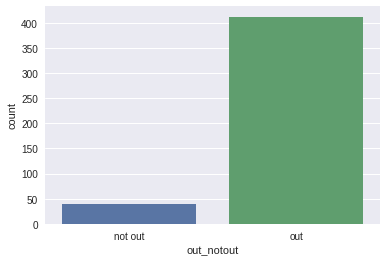

In [247]:
sns.countplot(d.out_notout)

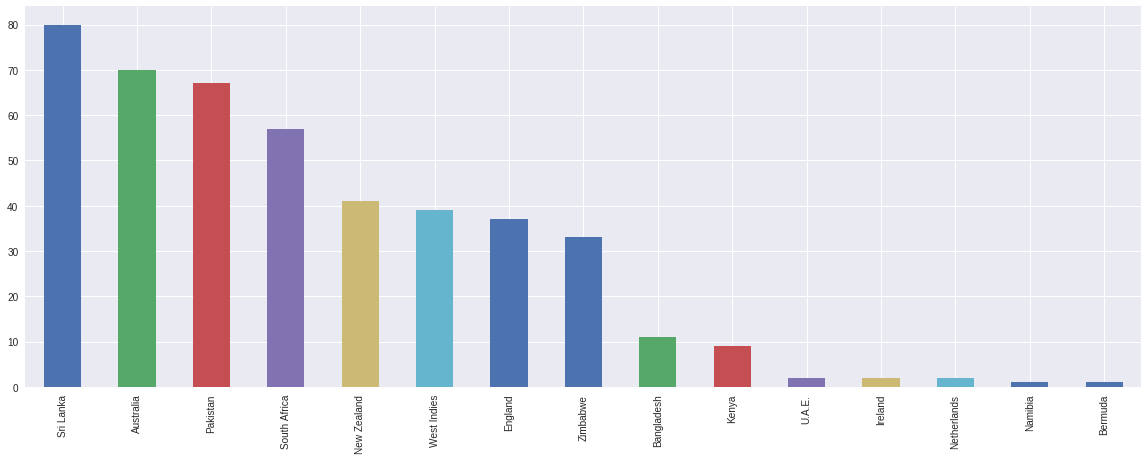

In [248]:
# Games against oppositions

d['opp'].value_counts().plot(kind="bar",figsize = (20,7))

In [249]:
# Innings with most Sixes.

d[d['sixes'] == d.sixes.max()]

,score,mins,balls_faced,fours,sixes,sr,pos,dismissal,innings,opp,ground,start_date,odi,out_notout
46,100,132.0,89,5,7,112.35,2,caught,2,Australia,Kanpur,7 Apr 1998,ODI # 1308,out


In [250]:
# Innings with most Fours.

d[d['fours'] == d.fours.max()]

,score,mins,balls_faced,fours,sixes,sr,pos,dismissal,innings,opp,ground,start_date,odi,out_notout
0,200,226.0,147,25,3,136.05,2,not out,1,South Africa,Gwalior,24 Feb 2010,ODI # 2962,not out


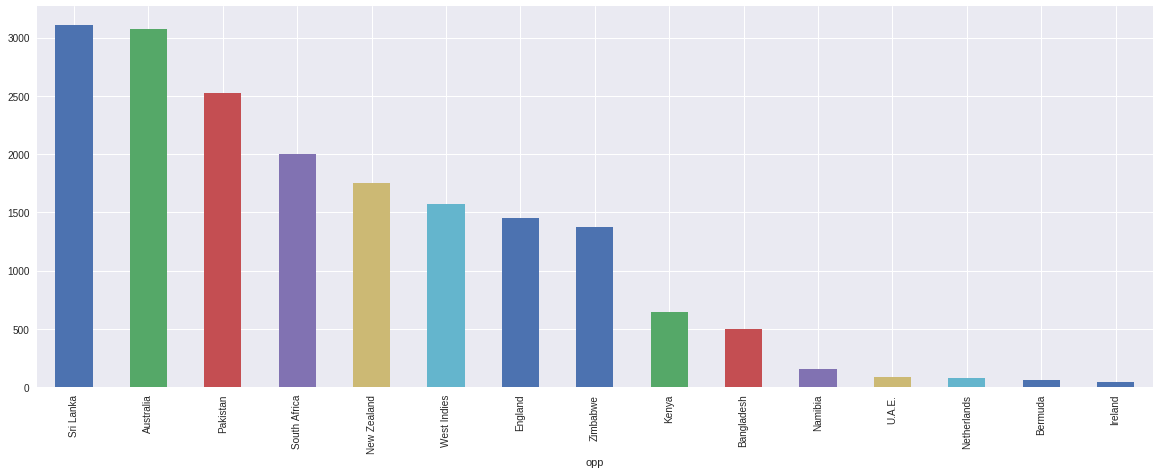

In [251]:
# Most runs against opp

d.groupby('opp')['score'].sum().sort_values(ascending=False).plot(kind="bar",figsize = (20,7))

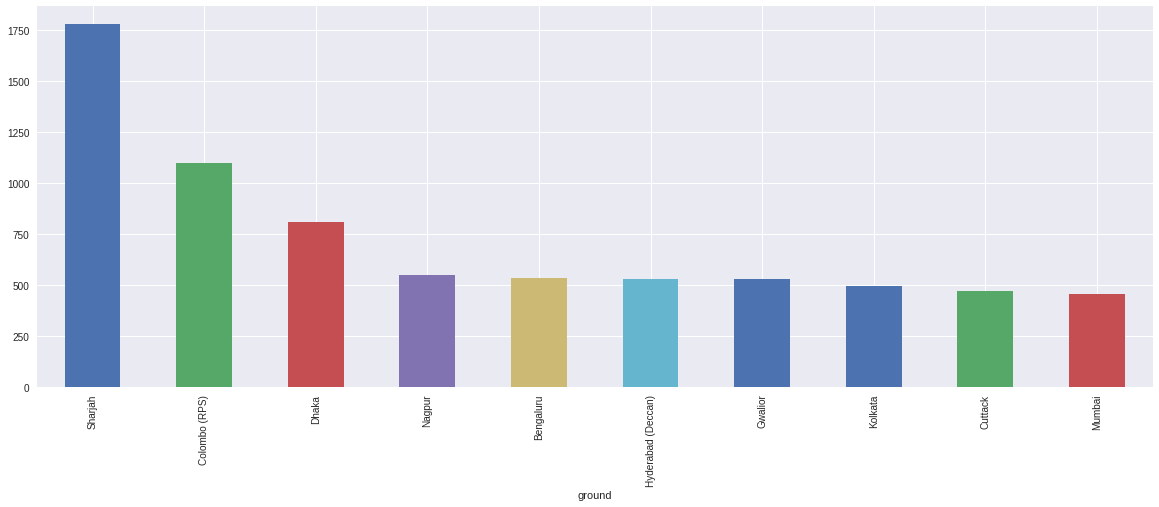

In [252]:
# Most runs at a certain ground - Top 10

d.groupby('ground')['score'].sum().sort_values(ascending=False)[:10].plot(kind="bar",figsize = (20,7))

In [253]:
d['ground'].unique()

array(['Gwalior', 'Hyderabad (Deccan)', 'Christchurch',
       'Pietermaritzburg', 'Jodhpur', 'Paarl', 'Sharjah', 'Kuala Lumpur',
       'Dhaka', 'Rawalpindi', 'Bristol', 'Indore', 'Colombo (RPS)',
       'Delhi', 'Cuttack', 'Bulawayo', 'Ahmedabad', 'Harare', 'Vadodara',
       'Colombo (SSC)', 'Bengaluru', 'Sydney', 'Mumbai', 'Nagpur',
       'Chester-le-Street', 'Jaipur', 'Benoni', 'Johannesburg', 'Kolkata',
       'Singapore', 'Kanpur', 'Peshawar', 'Belfast', 'Mohali',
       'Centurion', 'Lahore', 'The Oval', 'Hobart', 'Brisbane', 'Toronto',
       'Dunedin', 'Durban', 'Guwahati', 'Auckland', 'Hamilton',
       'Chandigarh', 'Leeds', 'Nairobi (Gym)', 'Rajkot', 'Chennai',
       'Port of Spain', 'Wellington', 'Melbourne', 'Visakhapatnam',
       'Manchester', 'Pune', 'Jalandhar', 'Adelaide', 'Perth', 'Amritsar',
       'East London', 'Bridgetown', 'Bloemfontein', 'Canberra',
       'Nottingham', 'Margao', 'Jamshedpur', "Lord's", 'Hove', 'Karachi',
       'Kochi', 'Moratuwa', 'Napier

In [0]:
home_grnd = ['Gwalior', 'Hyderabad (Deccan)','Jodhpur', 'Indore','Delhi', 'Cuttack','Ahmedabad','Vadodara',
       'Bengaluru', 'Mumbai', 'Nagpur','Jaipur','Kolkata','Kanpur',  'Mohali','Guwahati',
       'Chandigarh', 'Rajkot', 'Chennai','Visakhapatnam','Pune', 'Jalandhar','Amritsar',
       'Margao', 'Jamshedpur', 'Karachi','Kochi',  'Hyderabad (Sind)', 'New Delhi', 'Mumbai (BS)']

In [0]:
def home_away(x):
  if x in home_grnd:
    return "Home"
  else:
    return "Away"

In [0]:
d['home_away'] = d['ground'].apply(home_away)

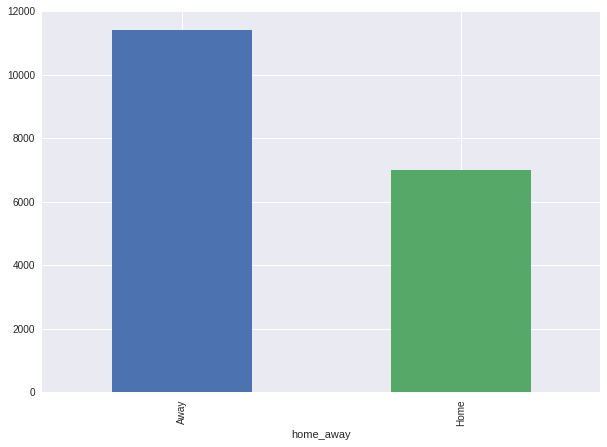

In [257]:
# Runs scored home vs away

d.groupby('home_away')['score'].sum().sort_values(ascending=False).plot(kind="bar",figsize = (10,7))

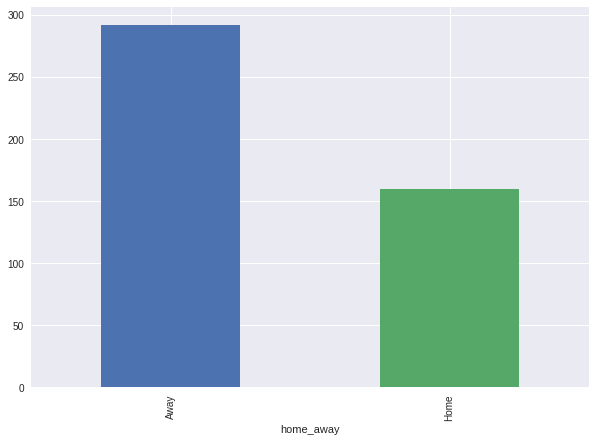

In [258]:
# Matches played home vs away

d.groupby('home_away')['score'].count().sort_values(ascending=False).plot(kind="bar",figsize = (10,7))

In [259]:
# Away vs Home, games vs score
# Sum = score, Count = games 

d.groupby('home_away')['score'].agg(['sum', 'count'])

,sum,count
home_away,,
Away,11414,292
Home,7012,160


In [260]:
# Games vs score by opp
# Sum = score, Count = games 

d.groupby('opp')['score'].agg(['sum', 'count']).sort_values(by = 'count', ascending = False)

,sum,count
opp,,
Sri Lanka,3113,80
Australia,3077,70
Pakistan,2526,67
South Africa,2001,57
New Zealand,1750,41
West Indies,1573,39
England,1455,37
Zimbabwe,1377,33
Bangladesh,496,11


In [261]:
# Games vs score by opp and home_away
# Sum = score, Count = games 

d.groupby(['opp','home_away'])['score'].agg(['sum', 'count']).sort_values(by = 'sum', ascending = False).unstack()

sum         count      
home_away       Away    Home  Away  Home
opp                                     
Australia     1516.0  1561.0  40.0  30.0
Bangladesh     463.0    33.0  10.0   1.0
Bermuda         57.0     NaN   1.0   NaN
England        824.0   631.0  21.0  16.0
Ireland          4.0    38.0   1.0   1.0
Kenya          402.0   245.0   6.0   3.0
Namibia        152.0     NaN   1.0   NaN
Netherlands     52.0    27.0   1.0   1.0
New Zealand    929.0   821.0  25.0  16.0
Pakistan      1935.0   591.0  49.0  18.0
South Africa  1019.0   982.0  36.0  21.0
Sri Lanka     2035.0  1078.0  53.0  27.0
U.A.E.          81.0     NaN   2.0   NaN
West Indies    896.0   677.0  23.0  16.0
Zimbabwe      1049.0   328.0  23.0  10.0

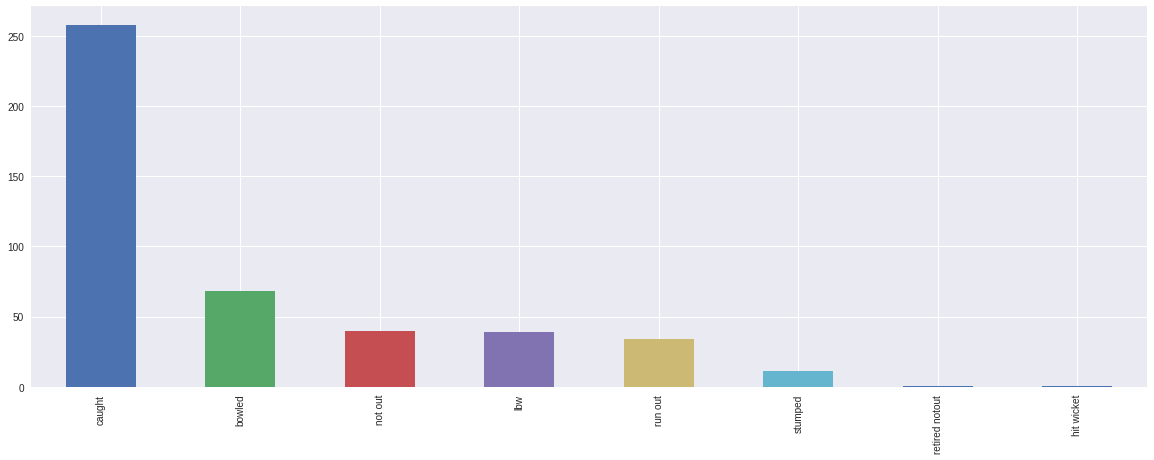

In [262]:
# Most common way of getting out.

d['dismissal'].value_counts().plot(kind="bar",figsize = (20,7))

In [0]:
match_res = pd.read_csv('drive/Colab Notebooks/SRT/match_results.csv')

In [264]:
match_res.head()

,odi,result
0,ODI # 2647,Pakistan won by 31 runs
1,ODI # 1650,Sri Lanka won by 68 runs
2,ODI # 3100,India won by 87 runs
3,ODI # 993,India won by 9 wickets (with 133 balls remaining)
4,ODI # 858,India won by 102 runs


In [0]:
data = pd.merge(d,match_res,on = 'odi')

In [266]:
data.shape

(452, 16)

In [267]:
data.head()

,score,mins,balls_faced,fours,sixes,sr,pos,dismissal,innings,opp,ground,start_date,odi,out_notout,home_away,result
0,200,226.0,147,25,3,136.05,2,not out,1,South Africa,Gwalior,24 Feb 2010,ODI # 2962,not out,Home,India won by 153 runs
1,186,221.0,150,20,3,124.00,2,not out,1,New Zealand,Hyderabad (Deccan),8 Nov 1999,ODI # 1523,not out,Home,India won by 174 runs
2,175,210.0,141,19,4,124.11,2,caught,2,Australia,Hyderabad (Deccan),5 Nov 2009,ODI # 2923,out,Home,Australia won by 3 runs
3,163,206.0,133,16,5,122.55,2,retired notout,1,New Zealand,Christchurch,8 Mar 2009,ODI # 2823,out,Away,India won by 58 runs
4,152,193.0,151,18,0,100.66,2,bowled,1,Namibia,Pietermaritzburg,23 Feb 2003,ODI # 1964,out,Away,India won by 181 runs


In [0]:
def split_res(x):
  try:
    val = x.split('won')[0]
    return val.strip()
  except:
    pass

In [0]:
data['winner'] = data.result.apply(split_res)

In [292]:
data.head()

,score,mins,balls_faced,fours,sixes,sr,pos,dismissal,innings,opp,ground,start_date,odi,out_notout,home_away,result,winner,win_loose
0,200,226.0,147,25,3,136.05,2,not out,1,South Africa,Gwalior,24 Feb 2010,ODI # 2962,not out,Home,India won by 153 runs,India,Loose
1,186,221.0,150,20,3,124.00,2,not out,1,New Zealand,Hyderabad (Deccan),8 Nov 1999,ODI # 1523,not out,Home,India won by 174 runs,India,Loose
2,175,210.0,141,19,4,124.11,2,caught,2,Australia,Hyderabad (Deccan),5 Nov 2009,ODI # 2923,out,Home,Australia won by 3 runs,Australia,Loose
3,163,206.0,133,16,5,122.55,2,retired notout,1,New Zealand,Christchurch,8 Mar 2009,ODI # 2823,out,Away,India won by 58 runs,India,Loose
4,152,193.0,151,18,0,100.66,2,bowled,1,Namibia,Pietermaritzburg,23 Feb 2003,ODI # 1964,out,Away,India won by 181 runs,India,Loose


In [0]:
data['win_loose'] = np.where(data['winner'] == "India","Win","Loose")

In [0]:
# Finally!

centurion_inns = data[data['score']>=100]

In [296]:
centurion_inns.shape

(49, 18)

In [309]:
centurion_inns.groupby(['win_loose','home_away','opp'])['score'].count().sort_values(ascending = False).unstack().fillna(0)

opp                  Australia  Bangladesh  England  Kenya  Namibia  \
win_loose home_away                                                   
Loose     Away             1.0         1.0      1.0    0.0      0.0   
          Home             1.0         0.0      1.0    0.0      0.0   
Win       Away             4.0         0.0      0.0    2.0      1.0   
          Home             3.0         0.0      0.0    2.0      0.0   

opp                  New Zealand  Pakistan  South Africa  Sri Lanka  \
win_loose home_away                                                   
Loose     Away               0.0       3.0           1.0        2.0   
          Home               0.0       1.0           1.0        1.0   
Win       Away               1.0       1.0           0.0        5.0   
          Home               4.0       0.0           3.0        0.0   

opp                  West Indies  Zimbabwe  
win_loose home_away                         
Loose     Away               1.0       0.0  
          Home               0.0       1.0  
Win       Away               1.0       4.0  
          Home               2.0       0.0

In [321]:
## Let's figure out how many times india won when Sachin scored less than 100

centurion_inns.groupby('win_loose')['score'].count()

win_loose
Loose    16
Win      33
Name: score, dtype: int64

In [345]:
print "When Sachin scores a century or more India's win % is {}".format(round((33/49.0)*100,2))

When Sachin scores a century or more India's win % is 67.35


In [341]:

data[(data['score']<100) & (data['score']>=50)].groupby('win_loose')['score'].count()

win_loose
Loose    37
Win      59
Name: score, dtype: int64

In [343]:
print "So that's {}%  win".format(round((59.0/(59+37))*100,2))

So that's 61.46%  win


In [342]:
data[(data['score']<50)].groupby('win_loose')['score'].count()

win_loose
Loose    168
Win      139
Name: score, dtype: int64

In [344]:
print "So that's {}%  win".format(round((139.0/(139+168))*100,2))

So that's 45.28%  win


### Scraping

In [0]:
# Let's try and scrape data from cricinfo, with appropriate wait times so we dont overload the website with requests.

In [0]:
# Same link from where we got the table above, on the page each of ODI id is a link to the scorecard of that game.
# so lets get ODI numbers and related hyperlinks

r = requests.get('http://stats.espncricinfo.com/ci/engine/player/35320.html?class=2;orderby=sixes;template=results;type=batting;view=innings')

# Soup will save the html
soup = BeautifulSoup(r.content, 'html.parser')

In [147]:
# This title was common for all games, so scraping the page to consolidate all such lines
# hopefully 460 odd matching number of SRT games.

list_of_matches = soup.find_all(title="view the scorecard for this row")

print "Number of ODI links in the page is: {}".format(len(list_of_matches))

Number of ODI links in the page is: 463


In [148]:
# Lets try and work out how to get individual scorecard link now that we have all links

# Taking one line
a = list_of_matches[0]
a

<a href="/ci/engine/match/66140.html" title="view the scorecard for this row">ODI # 1308</a>

In [149]:
# Get score card link

str(a.get("href"))

'/ci/engine/match/66140.html'

In [150]:
#Get ODI Number

str(a).split(">")[-2].split("<")[0]

'ODI # 1308'

In [0]:
# This needs to be concatenated to the score card link.

key = " http://stats.espncricinfo.com"

In [0]:
# Create a dict to store values
odi_dict = {}

In [0]:
for game in list_of_matches:
  odi_dict[str(game).split(">")[-2].split("<")[0]] = key+str(game.get("href"))

In [161]:
# Check
odi_dict.items()[10]

('ODI # 855', ' http://stats.espncricinfo.com/ci/engine/match/65970.html')

In [162]:
odi_dict.items()[10][1]

' http://stats.espncricinfo.com/ci/engine/match/65970.html'

In [0]:
# Seems to have worked! Now open 460+ webpages and get winners from them.

In [0]:
# Prototype one example.

req = requests.get(odi_dict.items()[10][1])
web_page = BeautifulSoup(req.content, 'html.parser')

In [165]:
web_page.find_all('span',{'class':'cscore_notes_game'})

[<span class="cscore_notes_game" data-reactid=".ahkob12k8w.3.0.1:$ghf.0.0.1.0.0">India won by 43 runs</span>,
 <span class="cscore_notes_game" data-reactid=".ahkob12k8w.3.0.1:$bc.0.0.0.0.1.0.0">India won by 43 runs</span>]

In [0]:
# Get the main thing from the string:

v = str(web_page.find_all('span',{'class':'cscore_notes_game'})[0])

In [170]:
v.split(">")[-2].split("<")[0]

'India won by 43 runs'

In [0]:
import time

In [0]:
final_dict = {}

def get_win_loss():
  for key, val in odi_dict.items():
    time.sleep(3)
    try:
      req = requests.get(val)
      w_p = BeautifulSoup(req.content, 'html.parser')
      v = str(w_p.find_all('span',{'class':'cscore_notes_game'})[0])
      final_dict[key] = v.split(">")[-2].split("<")[0]
    except:
      final_dict[key] = "Error"

In [0]:
get_win_loss()

In [183]:
len(final_dict.values())

463

In [0]:
match_results = pd.DataFrame(final_dict.items(), columns=['odi','result'])

In [186]:
match_results.head()

,odi,result
0,ODI # 2647,Pakistan won by 31 runs
1,ODI # 1650,Sri Lanka won by 68 runs
2,ODI # 3100,India won by 87 runs
3,ODI # 993,India won by 9 wickets (with 133 balls remaining)
4,ODI # 858,India won by 102 runs


In [0]:
match_results.to_csv('drive/Colab Notebooks/SRT/match_results.csv',index=False)